In [24]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (3).csv


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(next(iter(uploaded)), on_bad_lines='skip')
print("Dimensiones del DataFrame:", df.shape)
df.head()

Dimensiones del DataFrame: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
print("Conteo de valores NaN por columna:")
print(df.isnull().sum())

Conteo de valores NaN por columna:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [27]:
df_clean = df.dropna()
print("Filas antes:", len(df), " → Filas después de dropna():", len(df_clean))

Filas antes: 8950  → Filas después de dropna(): 8636


In [28]:
print("Conteo de NaN después de limpiar:")
print(df_clean.isnull().sum())

Conteo de NaN después de limpiar:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


#**HIPÓTESIS:**
*Los clientes con un límite de crédito alto, tienden a tener un saldo deudor más elevado, lo que sugiere que utilizan su capacidad de endeudamiento de manera más activa, pero esto no necesariamente implica un mal manejo de sus finanzas.*


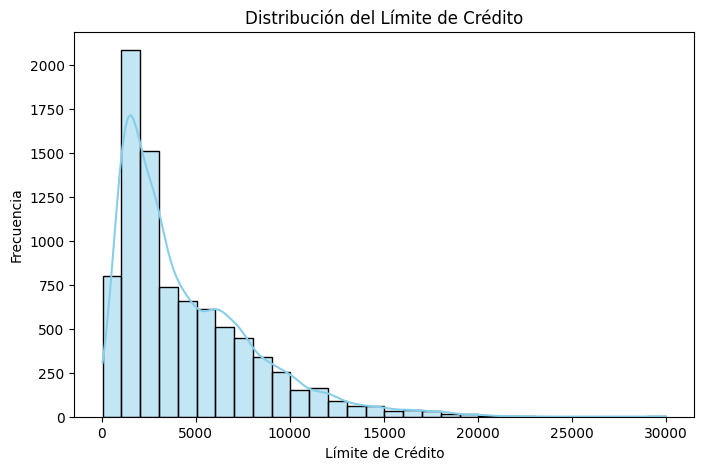

In [29]:

plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="CREDIT_LIMIT", bins=30, kde=True, color="skyblue")
plt.title("Distribución del Límite de Crédito")
plt.xlabel("Límite de Crédito")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-3634391415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["CreditCategory"] = pd.qcut(df_clean["CREDIT_LIMIT"], q=3, labels=["Bajo", "Medio", "Alto"])
/tmp/ipython-input-3634391415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="CreditCategory", y="BALANCE", palette="Set2")


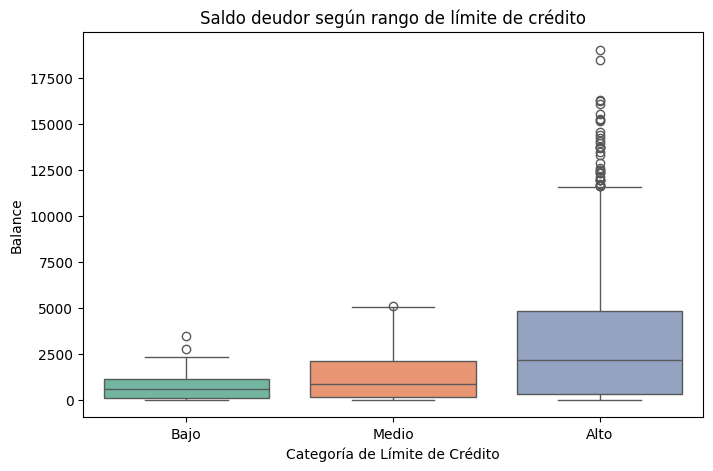

In [30]:
# Categorías de límite de crédito (bajo, medio, alto)
df_clean["CreditCategory"] = pd.qcut(df_clean["CREDIT_LIMIT"], q=3, labels=["Bajo", "Medio", "Alto"])

plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="CreditCategory", y="BALANCE", palette="Set2")
plt.title("Saldo deudor según rango de límite de crédito")
plt.xlabel("Categoría de Límite de Crédito")
plt.ylabel("Balance")
plt.show()


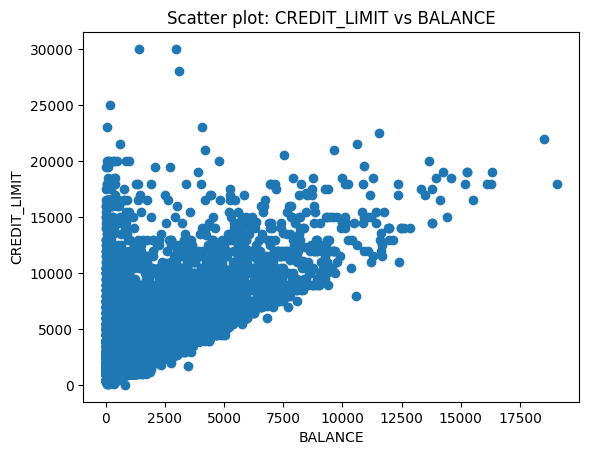

In [31]:
plt.scatter(df_clean['BALANCE'], df_clean['CREDIT_LIMIT'])
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.title('Scatter plot: CREDIT_LIMIT vs BALANCE')
plt.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Tomamos las dos columnas de interés
X = df_clean[['BALANCE', 'CREDIT_LIMIT']].values

# Escalamos los datos para mejorar clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

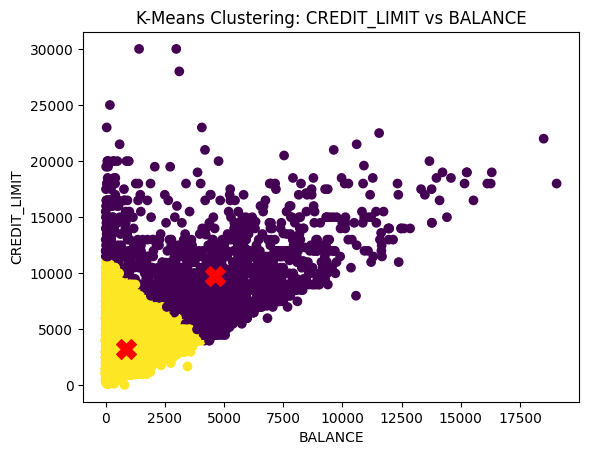

In [33]:
plt.scatter(df_clean['BALANCE'], df_clean['CREDIT_LIMIT'], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='red')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.title('K-Means Clustering: CREDIT_LIMIT vs BALANCE')
plt.show()

In [34]:
print("Primeros 30 labels:", labels[:30])
print("\nCentroides en unidades originales:")
print(centroids)

Primeros 30 labels: [1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0]

Centroides en unidades originales:
[[4628.73129451 9774.59377655]
 [ 852.65600773 3223.37862303]]
